inspiration: How do weather conditions affect marathon running performance in Berlin marathons?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
import datetime as dt
from datetime import timedelta
from datetime import datetime

# runners data prep

In [2]:
runners = pd.read_csv('C:\\Users\\janek\\Desktop\\ML\\Projekty\\Projekt analiza biegu\\Berlin_Marathon_data_1974_2019.csv',low_memory=False)

In [3]:
runners.head()

,YEAR,COUNTRY,GENDER,AGE,TIME
0,1974,NaN,male,L1,02:44:53
1,1974,NaN,male,L2,02:46:43
2,1974,NaN,male,L2,02:48:08
3,1974,NaN,male,L,02:48:40
4,1974,NaN,male,L1,02:49:01


In [4]:
runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884944 entries, 0 to 884943
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   YEAR     884944 non-null  int64 
 1   COUNTRY  30796 non-null   object
 2   GENDER   884944 non-null  object
 3   AGE      872106 non-null  object
 4   TIME     884944 non-null  object
dtypes: int64(1), object(4)
memory usage: 33.8+ MB


In [5]:
runners.isnull().sum()

YEAR            0
COUNTRY    854148
GENDER          0
AGE         12838
TIME            0
dtype: int64

In [6]:
runners.shape

(884944, 5)

There are 884944 rows in general and 884944 country infos are missing, so it means only 3,5% of Countries data is not null.

In [7]:
runners['COUNTRY'].value_counts()

GER    11005
USA     2232
GBR     2013
FRA     1111
ITA      983
       ...  
GHA        1
TAN        1
CMR        1
LAO        1
NGR        1
Name: COUNTRY, Length: 145, dtype: int64

In [8]:
854148/884944 #almost 97% of runners have no country assigned 

0.9652000578567683

In [9]:
runners = runners.drop(['COUNTRY'], axis=1) #deleting COUNTRY column

In [10]:
runners['AGE'].value_counts() #investigating age column

40     161743
35     144947
45     140503
20     120618
30     120124
50      96323
55      47585
60      22123
65       8319
18       5603
70       2564
75        621
A         235
L1        152
L         131
80        110
L2        106
B          56
M          50
M0         50
BM         39
L3         31
L4         16
DH         15
C          15
DA          8
D3          5
D2          5
D1          4
DB          2
Ber         1
DJ          1
M<          1
Name: AGE, dtype: int64

Deleting non understandable signs in age column

In [11]:
runners = runners[runners.AGE != "A"]
runners = runners[runners.AGE != "L1"]
runners = runners[runners.AGE != "L"]
runners = runners[runners.AGE != "L2"]
runners = runners[runners.AGE != "B"]
runners = runners[runners.AGE != "M"]
runners = runners[runners.AGE != "M0"]
runners = runners[runners.AGE != "BM"]
runners = runners[runners.AGE != "L3"]
runners = runners[runners.AGE != "L4"]
runners = runners[runners.AGE != "DH"]
runners = runners[runners.AGE != "C"]
runners = runners[runners.AGE != "DA"]
runners = runners[runners.AGE != "D3"]
runners = runners[runners.AGE != "D2"]
runners = runners[runners.AGE != "D1"]
runners = runners[runners.AGE != "DB"]
runners = runners[runners.AGE != "Ber"]
runners = runners[runners.AGE != "DJ"]
runners = runners[runners.AGE != "M<"]

In [12]:
runners['AGE'].value_counts() #age column value counts after deleting non-integer-like values

40    161743
35    144947
45    140503
20    120618
30    120124
50     96323
55     47585
60     22123
65      8319
18      5603
70      2564
75       621
80       110
Name: AGE, dtype: int64

In [13]:
runners['AGE'].isnull().sum()

12838

In [14]:
runners['AGE'] = runners['AGE'].fillna('40') #filling blank rows with dominant value

In [15]:
runners['AGE'] = runners['AGE'].astype(int) #converting age column values to integers

In [16]:
runners.sample(5)

,YEAR,GENDER,AGE,TIME
226498,1999,male,20,03:43:48
735687,2015,female,40,05:17:44
95868,1990,male,40,04:02:00
390440,2005,male,40,04:22:53
843713,2018,male,50,04:50:18


In [17]:
runners.isnull().sum()

YEAR      0
GENDER    0
AGE       0
TIME      0
dtype: int64

In [18]:
runners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884021 entries, 17 to 884943
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   YEAR    884021 non-null  int64 
 1   GENDER  884021 non-null  object
 2   AGE     884021 non-null  int32 
 3   TIME    884021 non-null  object
dtypes: int32(1), int64(1), object(2)
memory usage: 30.4+ MB


In [19]:
#LabelEncoding GENDER colmn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

runners['GENDER']=le.fit_transform(runners['GENDER'])
# 1 = male
# 0 = female

In [20]:
#converting TIME column into seconds 
runners = runners[runners['TIME'] != 'no time']
runners[runners['TIME'] != 'no time']
print(runners['TIME'].min())
print(runners['TIME'].max())

02:01:39
09:49:41


In [21]:
def time_to_sec(df):
    hours = df.dt.hour
    minutes = df.dt.minute
    seconds = df.dt.second
    return (hours * 3600) + (minutes * 60) + seconds

In [22]:
runners['TIME'] = pd.to_datetime(runners['TIME'], errors='coerce', format='%H:%M:%S')
runners_time_in_sec = time_to_sec(runners['TIME']) #works :)
runners_time_in_sec

17        11107
31        11702
32        11714
33        11740
36        11870
          ...  
884939    25937
884940    25950
884941    26128
884942    26368
884943    26769
Name: TIME, Length: 881617, dtype: int64

In [23]:
runners['TIME_IN_SEC'] = runners_time_in_sec
runners

,YEAR,GENDER,AGE,TIME,TIME_IN_SEC
17,1974,1,40,1900-01-01 03:05:07,11107
31,1974,1,40,1900-01-01 03:15:02,11702
32,1974,1,40,1900-01-01 03:15:14,11714
33,1974,1,40,1900-01-01 03:15:40,11740
36,1974,1,40,1900-01-01 03:17:50,11870
...,...,...,...,...,...
884939,2019,1,65,1900-01-01 07:12:17,25937
884940,2019,1,75,1900-01-01 07:12:30,25950
884941,2019,1,80,1900-01-01 07:15:28,26128
884942,2019,1,30,1900-01-01 07:19:28,26368


# Weather dataset prep

In [24]:
weather = pd.read_csv("C:\\Users\\janek\\Desktop\\ML\\Projekty\\Projekt analiza biegu\\Berlin_Marathon_weather_data_since_1974.csv")

In [25]:
weather.head()

,YEAR,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
0,1974,0.0,0.2,7.0,1009.5,5.4,8.8,1.1
1,1975,4.2,9.4,3.0,1011.4,14.3,20.1,9.5
2,1976,3.0,10.2,3.3,1010.4,12.8,18.0,7.3
3,1977,11.2,0.0,8.0,1013.1,9.7,12.5,7.4
4,1978,1.8,2.7,6.0,1000.6,11.2,14.5,9.4


In [26]:
weather.describe()

,YEAR,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1996.500000,1.976087,5.628043,4.489130,1009.800435,12.702174,18.019565,8.328261
std,13.422618,5.007824,4.530383,2.673344,8.017980,2.650659,3.800855,3.095995
min,1974.000000,0.000000,0.000000,0.100000,993.620000,5.400000,8.800000,1.100000
25%,1985.250000,0.000000,0.700000,2.000000,1005.375000,10.875000,15.400000,5.550000
50%,1996.500000,0.000000,6.950000,5.000000,1010.350000,12.750000,17.650000,8.650000
75%,2007.750000,1.075000,10.050000,7.000000,1014.030000,14.300000,20.250000,10.625000
max,2019.000000,29.800000,11.400000,8.000000,1026.800000,19.400000,27.600000,14.800000


In [27]:
weather.isnull().sum()

YEAR                0
PRECIP_mm           0
SUNSHINE_hrs        0
CLOUD_hrs           0
ATMOS_PRESS_mbar    0
AVG_TEMP_C          0
MAX_TEMP_C          0
MIN_TEMP_C          0
dtype: int64

In [28]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              46 non-null     int64  
 1   PRECIP_mm         46 non-null     float64
 2   SUNSHINE_hrs      46 non-null     float64
 3   CLOUD_hrs         46 non-null     float64
 4   ATMOS_PRESS_mbar  46 non-null     float64
 5   AVG_TEMP_C        46 non-null     float64
 6   MAX_TEMP_C        46 non-null     float64
 7   MIN_TEMP_C        46 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.0 KB


# Merge and initial analysis

In [29]:
data_merged = runners.merge(weather, how='right', on='YEAR')

In [30]:
data_merged['TIME'] = pd.to_datetime(data_merged['TIME'])

In [31]:
data_merged.sample(5)

,YEAR,GENDER,AGE,TIME,TIME_IN_SEC,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
816896,2018,1.0,35.0,1900-01-01 03:29:59,12599.0,0.0,7.75,5.6,1013.82,14.9,22.4,9.0
103521,1991,1.0,30.0,1900-01-01 03:24:00,12240.0,0.0,0.90,7.3,994.90,14.4,18.2,8.4
692174,2014,1.0,45.0,1900-01-01 04:41:49,16909.0,0.0,9.78,4.5,1016.39,12.7,21.2,5.1
202358,1998,1.0,35.0,1900-01-01 03:41:28,13288.0,0.0,9.90,1.0,1026.80,13.8,19.8,10.3
330994,2003,1.0,45.0,1900-01-01 04:26:16,15976.0,9.8,7.40,4.3,1005.90,12.0,18.7,4.4


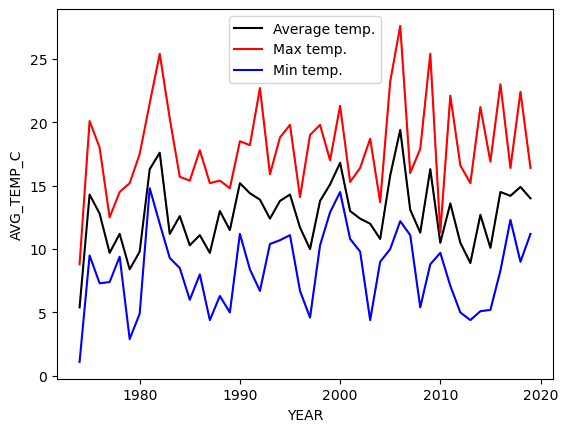

In [32]:
sns.lineplot(data=data_merged,x='YEAR',y='AVG_TEMP_C',color='black',label='Average temp.')
sns.lineplot(data=data_merged,x='YEAR',y='MAX_TEMP_C',color='red',label='Max temp.')
sns.lineplot(data=data_merged,x='YEAR',y='MIN_TEMP_C',color='blue',label='Min temp.')
plt.legend()
plt.show()

In [33]:
data_merged.corr()

,YEAR,GENDER,AGE,TIME_IN_SEC,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
YEAR,1.000000,-0.135509,0.196425,0.254982,0.079607,0.238709,-0.092052,0.047191,0.009612,0.128642,-0.055007
GENDER,-0.135509,1.000000,0.041495,-0.265583,0.011084,-0.070591,0.033051,-0.064200,0.005700,-0.036272,0.032098
AGE,0.196425,0.041495,1.000000,0.172136,0.016399,0.050062,-0.031264,0.006091,0.006495,0.030557,-0.006227
TIME_IN_SEC,0.254982,-0.265583,0.172136,1.000000,0.001103,0.109406,-0.069242,0.034093,0.083206,0.118777,0.035677
PRECIP_mm,0.079607,0.011084,0.016399,0.001103,1.000000,-0.376328,0.356465,-0.506288,-0.227994,-0.452276,0.046277
SUNSHINE_hrs,0.238709,-0.070591,0.050062,0.109406,-0.376328,1.000000,-0.880759,0.429150,0.066570,0.655116,-0.466513
CLOUD_hrs,-0.092052,0.033051,-0.031264,-0.069242,0.356465,-0.880759,1.000000,-0.329067,-0.015837,-0.530441,0.441984
ATMOS_PRESS_mbar,0.047191,-0.064200,0.006091,0.034093,-0.506288,0.429150,-0.329067,1.000000,-0.198904,0.157810,-0.269236
AVG_TEMP_C,0.009612,0.005700,0.006495,0.083206,-0.227994,0.066570,-0.015837,-0.198904,1.000000,0.758759,0.697058
MAX_TEMP_C,0.128642,-0.036272,0.030557,0.118777,-0.452276,0.655116,-0.530441,0.157810,0.758759,1.000000,0.161231


<AxesSubplot:xlabel='AVG_TEMP_C', ylabel='TIME_IN_SEC'>

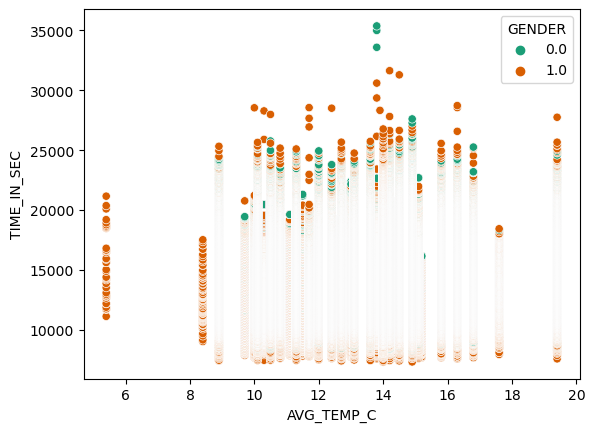

In [34]:
sns.scatterplot(data=data_merged, x='AVG_TEMP_C',y='TIME_IN_SEC',hue='GENDER', palette = 'Dark2')

In [ ]:
sns.lineplot(data=data_merged, x='SUNSHINE_hrs',y='TIME_IN_SEC')

In [ ]:
sns.lineplot(data=data_merged, x='AGE',y='TIME_IN_SEC')

As we can see, AVG_TEMP_C impacts results of runners

In [ ]:
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(data=data_merged.drop('TIME',axis=1), annot=True)

In [ ]:
data_merged.info()

# Regression models

Data split

In [ ]:
data_merged = data_merged.dropna()

In [ ]:
data_merged.isnull().sum()

In [ ]:
data_merged = data_merged.reset_index()

In [ ]:
from sklearn.model_selection import train_test_split

X = data_merged.drop(['TIME','TIME_IN_SEC'],axis =1)
y = data_merged['TIME_IN_SEC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 10, num = 1)]
max_depth = [int(x) for x in np.linspace(1,10,num =1)]
max_features = ['auto','sqrt']
min_samples_leaf = [int(x) for x in list(range(1,8))]
min_samples_split = [int(x) for x in list(range(2,10))]
bootstrap = [True,False]
             
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'max_features':max_features,
               'min_samples_leaf':min_samples_leaf,
               'min_samples_split':min_samples_split,
               'bootstrap':bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

RFR_adj = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 5, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

RFR_adj.fit(X_train,y_train)

In [ ]:
RFR_adj.best_params_

In [ ]:
RFR_fited = RandomForestRegressor(n_estimators = 3, min_samples_split = 6, min_samples_leaf = 4, max_features = 'sqrt', 
                                  max_depth = 1, bootstrap = True)
RFR_fited.fit(X_train,y_train)

In [ ]:
RFR_fited.score(X_train,y_train)

In [ ]:
RFR_fited.score(X_test,y_test)

Summing up, weather conditions have some impact on results of competitors, however it is not significant. Age and gender are crucial variables when it comes to impact on the result. It is worth noticing that the greatest results were acomplished when avg. temp. fluctuated between 10 and 17 degrees.